# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ruster import Ruster
import time
import sys 
import os

color_1 = "salmon"
color_2 = "deepskyblue"
color_3 = "lightgreen"

r = Ruster(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")

print(r.sum([1, 2, 3]))

6


# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

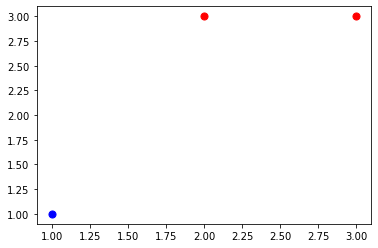

<Figure size 432x288 with 0 Axes>

In [130]:
plt.scatter(X[0, 0], X[0, 1], color='blue', s=50)
plt.scatter(X[1:3,0], X[1:3,1], color='red', s=50)
plt.show()
plt.clf()

[-0.8160224 -0.5067749 -0.6377115]


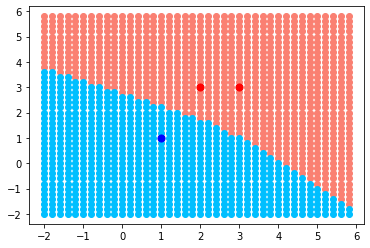

In [35]:
x = X.flatten().tolist()
y = Y.flatten().tolist()


ndim = 2
gamma = 2.5
model_size = int(len(x) / ndim)
model = r.create_linear_model(model_size-1)
print(r.npify(model, model_size))

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []


for _ in range(5):
    points_x1_blue = []
    points_x2_blue = []
    points_x1_red = []
    points_x2_red = []
    for i in np.arange(-2.0, 6.0, 0.2):
        for j in np.arange(-2.0, 6.0, 0.2):
            predict = r.predict_rbf_naive(model, x, np.array([i,j]), ndim, gamma, True)
#             print(f"{_} {predict_reg} {i} {j}")
            if predict >= 0.0:
                points_x1_blue.append(i)
                points_x2_blue.append(j)
            else:
                points_x1_red.append(i)
                points_x2_red.append(j)

    r.train_rosenblatt_rbf(model, x, y, ndim, 20, 0.01, 0.1)
#     print(r.npify(model, model_size))

plt.scatter(points_x1_red, points_x2_red, c=color_1)
plt.scatter(points_x1_blue, points_x2_blue, c=color_2)
# plt.scatter(clusters[0], clusters[1], color='lightgreen', s=400)
# plt.scatter(clusters[2], clusters[3], color='lightgreen', s=400)
plt.scatter(X[0, 0], X[0, 1], color='blue', s=50)
plt.scatter(X[1:3,0], X[1:3,1], color='red', s=50)
plt.show()

r.destroy(model, model_size)

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [38]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

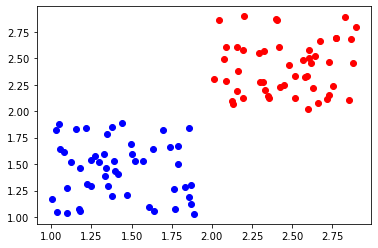

<Figure size 432x288 with 0 Axes>

In [132]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

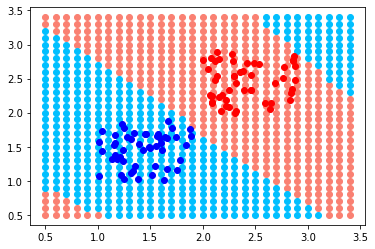

In [70]:
x = X.flatten().tolist()
y = Y.flatten().tolist()


ndim = 2
gamma = 1.0
model_size = int(len(x) / ndim)
model = r.create_linear_model(model_size-1)
# print(r.npify(model, model_size))

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []

for _ in range(10):
    points_x1_blue = []
    points_x2_blue = []
    points_x1_red = []
    points_x2_red = []
    for i in np.arange(0.5, 3.5, 0.1):
        for j in np.arange(0.5, 3.5, 0.1):
            predict = r.predict_rbf_naive(model, x, np.array([i,j]), ndim, gamma, True)
#             print(f"{_} {predict_reg} {i} {j}")
            if predict >= 0.0:
                points_x1_blue.append(i)
                points_x2_blue.append(j)
            else:
                points_x1_red.append(i)
                points_x2_red.append(j)

    r.train_rosenblatt_rbf(model, x, y, ndim, 20, 0.01, 0.1)
#     print(r.npify(model, model_size))

plt.scatter(points_x1_red, points_x2_red, c=color_1)
plt.scatter(points_x1_blue, points_x2_blue, c=color_2)
# plt.scatter(clusters[0], clusters[1], color='lightgreen', s=400)
# plt.scatter(clusters[2], clusters[3], color='lightgreen', s=400)
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()

r.destroy(model, model_size)

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [80]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

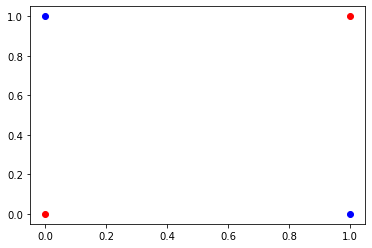

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

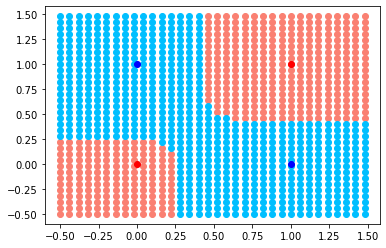

In [162]:
x = X.flatten().tolist()
y = Y.flatten().tolist()


ndim = 2
gamma = 5.0
model_size = int(len(x) / ndim)
model = r.create_linear_model(model_size-1)
# print(r.npify(model, model_size))

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []

for _ in range(50):
    points_x1_blue = []
    points_x2_blue = []
    points_x1_red = []
    points_x2_red = []
    for i in np.arange(-0.5, 1.5, 0.06):
        for j in np.arange(-0.5, 1.5, 0.06):
            predict = r.predict_rbf_naive(model, x, np.array([i,j]), ndim, gamma, True)
#             print(f"{_} {predict_reg} {i} {j}")
            if predict >= 0.0:
                points_x1_blue.append(i)
                points_x2_blue.append(j)
            else:
                points_x1_red.append(i)
                points_x2_red.append(j)

    r.train_rosenblatt_rbf(model, x, y, ndim, 20, 0.01, 0.1)
#     print(r.npify(model, model_size))

plt.scatter(points_x1_red, points_x2_red, c=color_1)
plt.scatter(points_x1_blue, points_x2_blue, c=color_2)
# plt.scatter(clusters[0], clusters[1], color='lightgreen', s=400)
# plt.scatter(clusters[2], clusters[3], color='lightgreen', s=400)
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()

r.destroy(model, model_size)

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [3]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

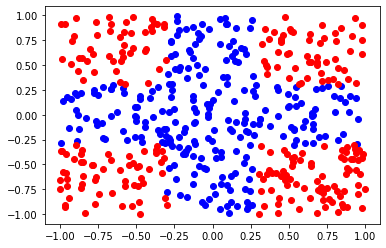

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

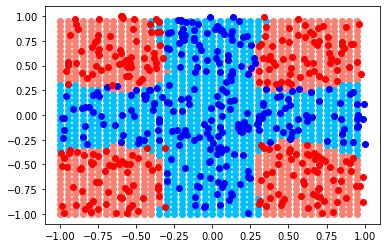

In [7]:
x = X.flatten().tolist()
y = Y.flatten().tolist()


ndim = 2
gamma = 5.0
model_size = int(len(x) / ndim)
model = r.create_linear_model(model_size-1)
# print(r.npify(model, model_size))

points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []

for _ in range(50):
    points_x1_blue = []
    points_x2_blue = []
    points_x1_red = []
    points_x2_red = []
    for i in np.arange(-1.0, 1.0, 0.05):
        for j in np.arange(-1.0, 1.0, 0.05):
            predict = r.predict_rbf_naive(model, x, np.array([i,j]), ndim, gamma, True)
#             print(f"{_} {predict_reg} {i} {j}")
            if predict >= 0.0:
                points_x1_blue.append(i)
                points_x2_blue.append(j)
            else:
                points_x1_red.append(i)
                points_x2_red.append(j)

    r.train_rosenblatt_rbf(model, x, y, ndim, 20, 0.01, 0.1)
#     print(r.npify(model, model_size))

plt.scatter(points_x1_red, points_x2_red, c=color_1)
plt.scatter(points_x1_blue, points_x2_blue, c=color_2)
# plt.scatter(clusters[0], clusters[1], color='lightgreen', s=400)
# plt.scatter(clusters[2], clusters[3], color='lightgreen', s=400)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()

r.destroy(model, model_size)

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [98]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])
X = X[[not np.all(arr == [0, 0, 0]) for arr in Y]]
Y = Y[[not np.all(arr == [0, 0, 0]) for arr in Y]]

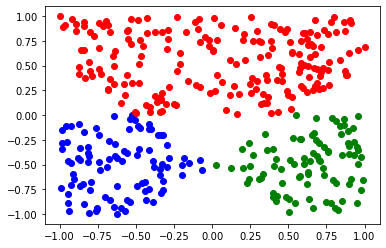

<Figure size 432x288 with 0 Axes>

In [99]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [70]:
X_train = [coord for sublist in X for coord in sublist]

Y_train_blue = list(map(lambda y: 1 if y[0] == 1 else 0, Y))

print(Y_train_blue[:5])
print(X_train[:5])

[0, 0, 0, 0, 0]
[0.5354571169482636, 0.20893725845157385, 0.014639888587694605, 0.8132419363731835, -0.4771630412394534]


### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [12]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

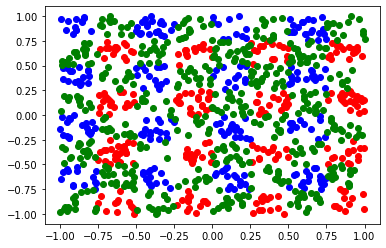

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [14]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

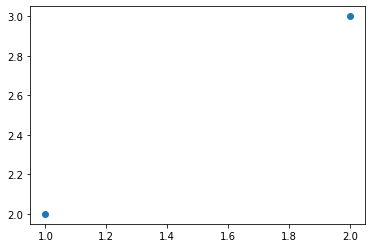

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [16]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

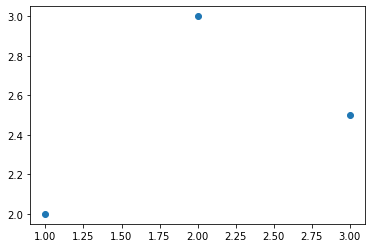

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [18]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

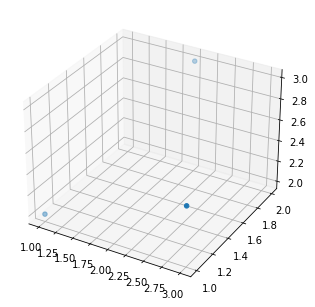

<Figure size 432x288 with 0 Axes>

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [20]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

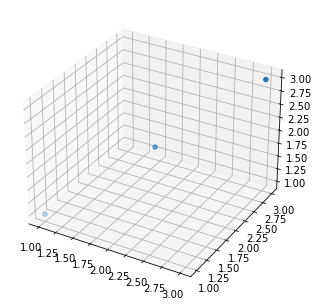

<Figure size 432x288 with 0 Axes>

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [22]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

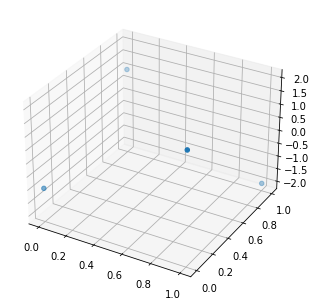

<Figure size 432x288 with 0 Axes>

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()